In [26]:
import databaseconfig as cfg
import pandas as pd
import matplotlib.pyplot as plt

from sqlalchemy import create_engine
address='postgresql://postgres:'+cfg.postgres['pw']+'@'+cfg.postgres['host']+':5432/Pewlett_Hackard'
engine = create_engine(address)
conn = engine.connect()


# Had to install psycopg2.

In [15]:
#from decimal import *

salary_df = pd.read_sql("SELECT s.salary, t.title FROM salaries AS s INNER JOIN titles AS t ON s.emp_no=t.emp_no", conn)
#getcontext().prec = 9
#salary_list=[Decimal(num) for num in salary_list]

salary_df.head(10)

,salary,title
0,78228.0,Senior Staff
1,78228.0,Staff
2,72488.0,Engineer
3,42365.0,Staff
4,55881.0,Engineer
5,55881.0,Senior Engineer
6,41538.0,Engineer
7,41538.0,Senior Engineer
8,49324.0,Engineer
9,49324.0,Senior Engineer


In [16]:
max_sal=salary_df['salary'].max()
min_sal=salary_df['salary'].min()
print(min_sal)
print(max_sal)

40000.0
129492.0


In [35]:
num_bins=20
bin_width=(130000-min_sal)/20

bins = [float(min_sal+bin_width*j) for j in range(0,21)]

print(bins)

group_labels = [str(bins[j]/1000)+'K-'+str(bins[j+1]/1000)+'K' for j in range(0,20)]

salary_df['bin']=pd.cut(salary_df['salary'], bins, labels=group_labels)

[40000.0, 44500.0, 49000.0, 53500.0, 58000.0, 62500.0, 67000.0, 71500.0, 76000.0, 80500.0, 85000.0, 89500.0, 94000.0, 98500.0, 103000.0, 107500.0, 112000.0, 116500.0, 121000.0, 125500.0, 130000.0]


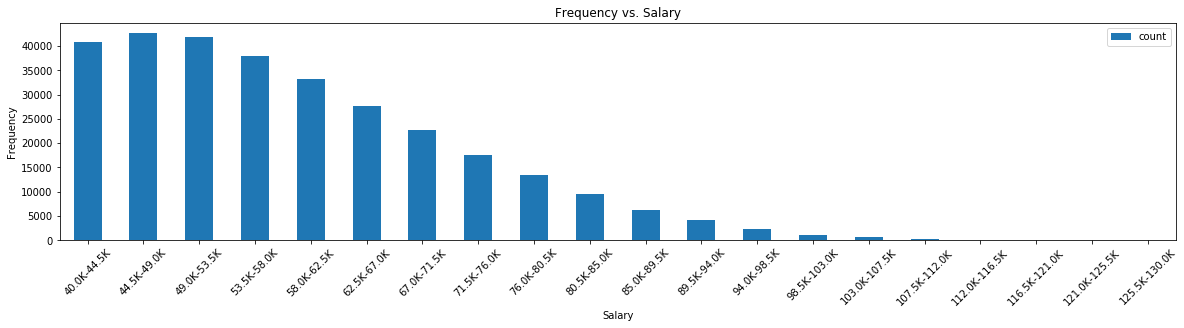

In [45]:
salary_gb = salary_df.groupby('bin')

sal_plot_df = pd.DataFrame(salary_gb['title'].count()).rename(columns={'title':'count'})

sal_plot_df.head()

sal_plot_df.plot.bar(y='count', rot=45, figsize=(20,4))

plt.title('Frequency vs. Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

The above salary distribution seems reasonable.

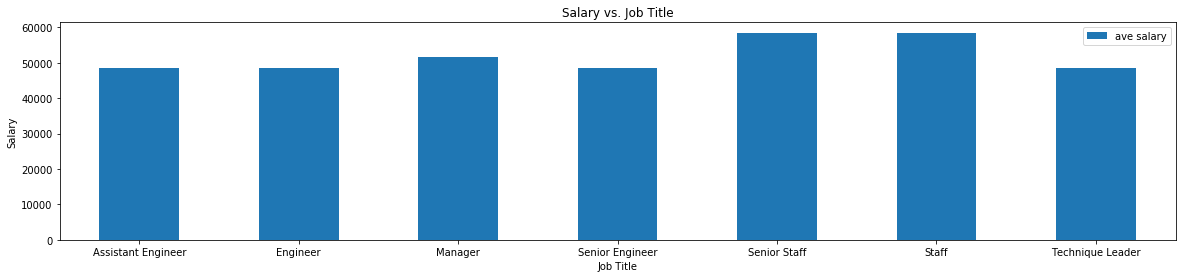

In [44]:
job_gb = salary_df.groupby('title')

job_plot_df = pd.DataFrame(job_gb['salary'].mean()).rename(columns={'salary':'ave salary'})

job_plot_df.head()

job_plot_df.plot.bar(y='ave salary', rot=0, figsize=(20,4))

plt.title('Salary vs. Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

Assistant Engineer, Engineer, and Senior Engineer should not have the same average salary.  Same for Senior Staff and Staff. So, the data set seems fake.